In [5]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, weights, bias=0):
        self.weights = np.array(weights)
        self.bias = bias

    def _calculate_net_input(self, inputs):
        inputs = np.array(inputs)
        if inputs.ndim == 0:
            return inputs * np.sum(self.weights) + self.bias 
        return np.dot(inputs, self.weights) + self.bias

    def activate_sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def activate_relu(self, z):
        return np.maximum(0, z)

    def activate_threshold(self, z, threshold=0):
        return np.where(z >= threshold, 1, 0)

    def get_output(self, inputs, activation_type='sigmoid'):
        z = self._calculate_net_input(inputs)
        
        if activation_type == 'sigmoid':
            return self.activate_sigmoid(z)
        elif activation_type == 'relu':
            return self.activate_relu(z)
        elif activation_type == 'threshold':
            return self.activate_threshold(z)
        else:
            raise ValueError("Неизвестный тип функции активации")

def plot_activation_functions():
    z = np.linspace(-10, 10, 400)

    sigmoid_out = 1 / (1 + np.exp(-z))
    relu_out = np.maximum(0, z)
    threshold_out = np.where(z >= 0, 1, 0)

    plt.figure(figsize=(10, 6))
    
    plt.plot(z, sigmoid_out, label='Сигмоида (Sigmoid)', linewidth=2, color='blue')
    plt.plot(z, relu_out, label='ReLU', linewidth=2, color='green', linestyle='--')
    plt.plot(z, threshold_out, label='Пороговая (Threshold)', linewidth=2, color='red', linestyle='-.')
    
    plt.title('Функции активации искусственного нейрона', fontsize=14)
    plt.xlabel('Взвешенная сумма входов (z)', fontsize=12)
    plt.ylabel('Выход нейрона (y)', fontsize=12)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.ylim(-0.5, 1.5)
    
    plt.show()


Веса нейрона: [0.5, -0.3, 0.8]
Смещение (bias): 0.1
Входные данные: [1.0, 2.0, 0.5]
Взвешенная сумма (z): 0.4000
Выход нейрона (sigmoid  ): 0.5987
Выход нейрона (relu     ): 0.4000
Выход нейрона (threshold): 1.0000


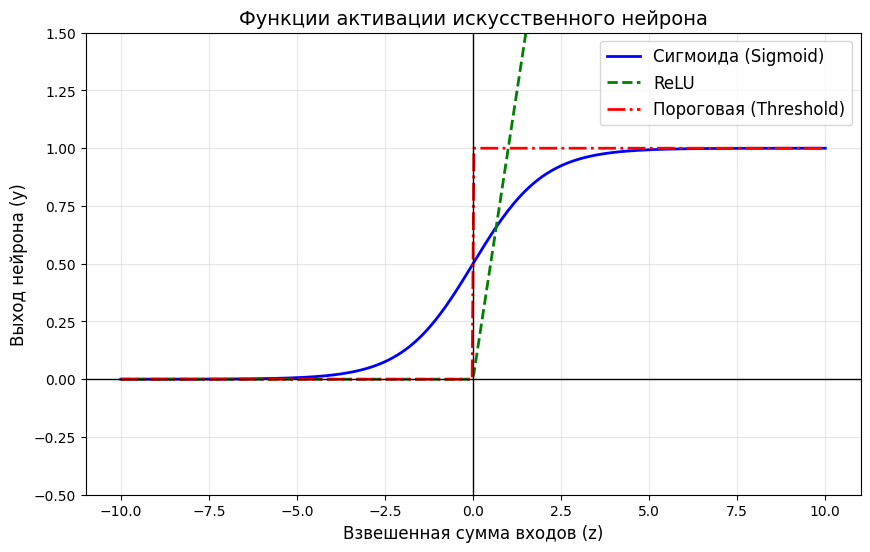

In [6]:
weights = [0.5, -0.3, 0.8]
bias = 0.1
neuron = Neuron(weights, bias)

input_data = [1.0, 2.0, 0.5]

print(f"Веса нейрона: {weights}")
print(f"Смещение (bias): {bias}")
print(f"Входные данные: {input_data}")

z = np.dot(input_data, weights) + bias
print(f"Взвешенная сумма (z): {z:.4f}")

activations = ['sigmoid', 'relu', 'threshold']

for act in activations:
    output = neuron.get_output(input_data, activation_type=act)
    print(f"Выход нейрона ({act:9s}): {output:.4f}")

plot_activation_functions()